In [6]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
#importing data
nifty=pd.read_csv('nifty.csv',index_col='Date',parse_dates=True)

In [8]:
nifty

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-01,8653.150391,8669.599609,8614.500000,8626.250000,8626.250000,165000.0
2016-11-02,8542.799805,8549.500000,8504.849609,8514.000000,8514.000000,155300.0
2016-11-03,8499.849609,8537.650391,8476.150391,8484.950195,8484.950195,170500.0
2016-11-04,8503.599609,8504.000000,8400.250000,8433.750000,8433.750000,224800.0
2016-11-07,8535.750000,8535.849609,8481.450195,8497.049805,8497.049805,172800.0
...,...,...,...,...,...,...
2021-10-25,18229.500000,18241.400390,17968.500000,18125.400390,18125.400390,418700.0
2021-10-26,18154.500000,18310.449220,18099.300780,18268.400390,18268.400390,341400.0
2021-10-27,18295.849610,18342.050780,18167.900390,18210.949220,18210.949220,335200.0


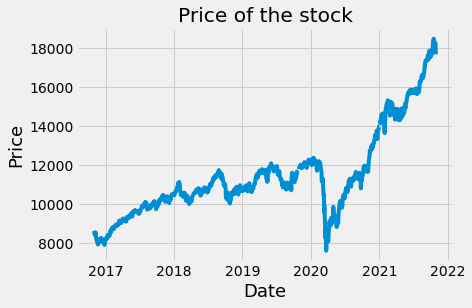

In [9]:
#visualizing the data
plt.plot(nifty['Close'])
plt.title('Price of the stock')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

In [10]:
#Caculate the On Balance Volume
obv=[]
obv.append(0)
#Loop through the data set from the second row (index 1 ) to the end of the dataset
for i in range(1,len(nifty.index)):
    if nifty['Close'][i]>nifty['Close'][i-1]:
        obv.append(obv[-1]+nifty.Volume[i])
    elif nifty.Close[i]<nifty.Close[i-1]:
        obv.append(obv[-1]-nifty.Volume[i])
    else:
        obv.append(obv[-1])
        

In [11]:
#Storing the obv and obv exponential moving average(ema ) into new columns:
nifty['obv']=obv
nifty['obv_ema']=nifty['obv'].ewm(span=20).mean()
nifty

,Open,High,Low,Close,Adj Close,Volume,obv,obv_ema
Date,,,,,,,,
2016-11-01,8653.150391,8669.599609,8614.500000,8626.250000,8626.250000,165000.0,0.0,0.000000e+00
2016-11-02,8542.799805,8549.500000,8504.849609,8514.000000,8514.000000,155300.0,-155300.0,-8.153250e+04
2016-11-03,8499.849609,8537.650391,8476.150391,8484.950195,8484.950195,170500.0,-325800.0,-1.712261e+05
2016-11-04,8503.599609,8504.000000,8400.250000,8433.750000,8433.750000,224800.0,-550600.0,-2.807455e+05
2016-11-07,8535.750000,8535.849609,8481.450195,8497.049805,8497.049805,172800.0,-377800.0,-3.042221e+05
...,...,...,...,...,...,...,...,...
2021-10-25,18229.500000,18241.400390,17968.500000,18125.400390,18125.400390,418700.0,51731700.0,5.114596e+07
2021-10-26,18154.500000,18310.449220,18099.300780,18268.400390,18268.400390,341400.0,52073100.0,5.123426e+07
2021-10-27,18295.849610,18342.050780,18167.900390,18210.949220,18210.949220,335200.0,51737900.0,5.128223e+07


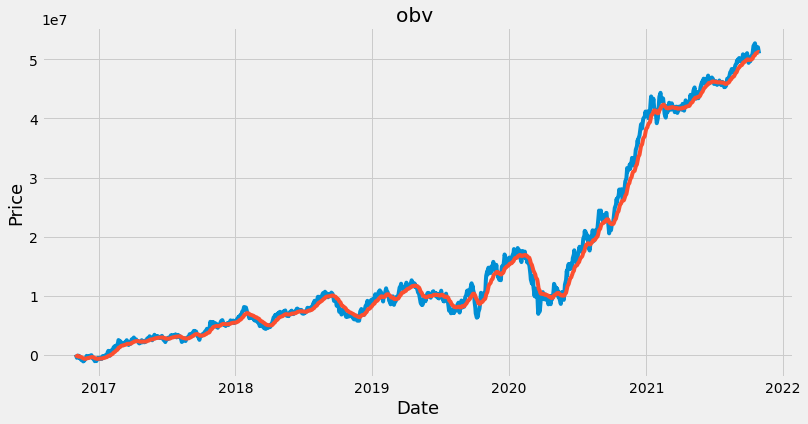

In [12]:
#create plot the graph
plt.figure(figsize=(12,6))
plt.plot(nifty['obv'])
plt.plot(nifty['obv_ema'])
plt.title('obv ')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

In [35]:
#Created a function to signal when to  buy and sell the stock
#If OBv>OBV_EMA then buy
#If Obv<OBV_EMA then sell
#Else do nothing

def buy_sell(signal,col1,col2):
    sigPriceBuy=[]
    sigPriceSell=[]
    flag=-1
    #loop throug the length of the data set
    for i in range(0,len(nifty.index)):
        if signal[col1][i]>signal[col2][i] and flag!=1:
            sigPriceBuy.append(signal['Close'][i])
            sigPriceSell.append(np.nan)
            flag=1
        #If Obv<OBV_EMA then sell
        elif signal[col1][i]<signal[col2][i] and flag!=0:
            sigPriceSell.append(signal['Close'][i])
            sigPriceBuy.append(np.nan)
            flag=0
        else:
            sigPriceSell.append(np.nan)
            sigPriceBuy.append(np.nan)
            
    return (sigPriceBuy,sigPriceSell)
            
            
            
            

In [36]:
x=buy_sell(nifty,'obv','obv_ema')
x

([nan,
  nan,
  nan,
  nan,
  nan,
  8543.549805,
  nan,
  8525.75,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  8126.899901999999,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  8103.600098000001,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  8288.599609,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  8716.400391,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  9086.299805,
  nan,
  nan,
  9100.799805,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  9306.599609,
  nan,
  nan,
  nan,
  9313.799805,
  nan,
  9359.900391,
  nan,
  9314.049805,


In [37]:
nifty['Buy_Signal_Price']=x[0]
nifty['Sell_Signal_Price']=x[1]
nifty

,Open,High,Low,Close,Adj Close,Volume,obv,obv_ema,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2016-11-01,8653.150391,8669.599609,8614.500000,8626.250000,8626.250000,165000.0,0.0,0.000000e+00,NaN,NaN
2016-11-02,8542.799805,8549.500000,8504.849609,8514.000000,8514.000000,155300.0,-155300.0,-8.153250e+04,NaN,8514.00000
2016-11-03,8499.849609,8537.650391,8476.150391,8484.950195,8484.950195,170500.0,-325800.0,-1.712261e+05,NaN,NaN
2016-11-04,8503.599609,8504.000000,8400.250000,8433.750000,8433.750000,224800.0,-550600.0,-2.807455e+05,NaN,NaN
2016-11-07,8535.750000,8535.849609,8481.450195,8497.049805,8497.049805,172800.0,-377800.0,-3.042221e+05,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,18229.500000,18241.400390,17968.500000,18125.400390,18125.400390,418700.0,51731700.0,5.114596e+07,NaN,NaN
2021-10-26,18154.500000,18310.449220,18099.300780,18268.400390,18268.400390,341400.0,52073100.0,5.123426e+07,NaN,NaN
2021-10-27,18295.849610,18342.050780,18167.900390,18210.949220,18210.949220,335200.0,51737900.0,5.128223e+07,NaN,NaN


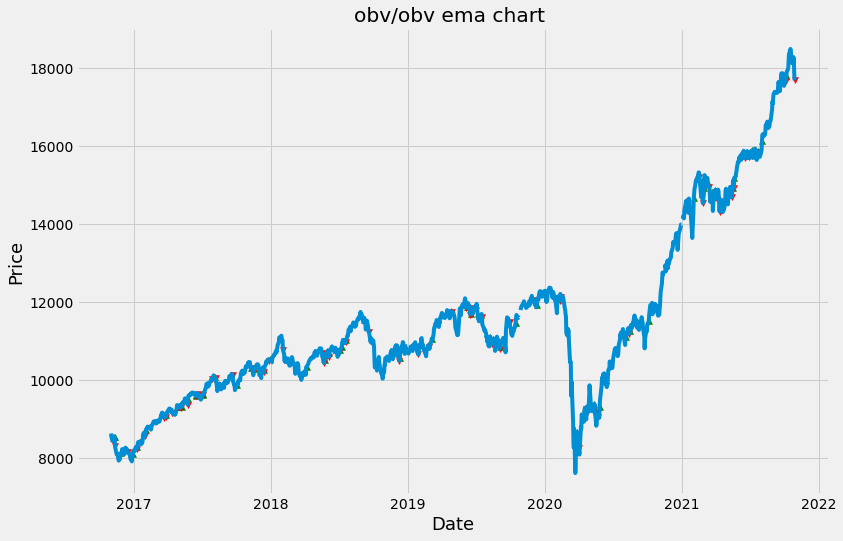

In [38]:
#Ploting the buy and sell signal 
plt.figure(figsize=(12,8))
plt.plot(nifty['Close'],label='Close')
plt.scatter(nifty.index,nifty['Buy_Signal_Price'],label='Buy Signal',marker='^',color='green')
plt.scatter(nifty.index,nifty['Sell_Signal_Price'],label='Sell Signal',marker='v',color='red')
plt.title('obv/obv ema chart ')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()